# Preprocesado


In [31]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

#  Estandarizacion
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

#  Encoding
# ------------------------------------------------------------------------------
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Cargamos el dataframe
df = pd.read_pickle('../Datos/obesity_eda.pkl')
df.head()

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,21.0,2.0,3.0,2.0,0.0,1.0,1.62,64.0
1,1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,21.0,3.0,3.0,3.0,3.0,0.0,1.52,56.0
2,2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,23.0,2.0,3.0,2.0,2.0,1.0,1.80,77.0
3,3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,27.0,3.0,3.0,2.0,2.0,0.0,1.80,87.0
4,4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,22.0,2.0,1.0,2.0,0.0,0.0,1.78,89.8



En esta lección realizaremos los cambios oportunos para poder ejecutar el modelo de regresión logística.

Cuando nos enfrentamos a problemas de regresión lineal vimos que eran necesarios algunos cambios antes de poder ajustar los modelos. 

En el caso de la regresión logística lo tendremos que hacer. Estos cambios incluyen:


### Estandarización de las variables predictoras numéricas


In [36]:
numericas= df.select_dtypes(include=np.number).drop('index', axis=1)
numericas

,age,height,weight
0,21.0,1.620000,64.000000
1,21.0,1.520000,56.000000
2,23.0,1.800000,77.000000
3,27.0,1.800000,87.000000
4,22.0,1.780000,89.800000
...,...,...,...
2106,21.0,1.710730,131.408528
2107,22.0,1.748584,133.742943
2108,23.0,1.752206,133.689352
2109,24.0,1.739450,133.346641


In [39]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [40]:
# ajustamos nuestros datos.  

scaler.fit(numericas)

StandardScaler()

In [41]:
X_escaladas = scaler.transform(numericas)

In [42]:
#lo hacemos dataframe
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,age,height,weight
0,-0.521741,-0.875589,-0.862558
1,-0.521741,-1.947599,-1.168077


In [43]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2111.0,-9.857371e-16,1.000237,-1.623137,-0.679083,-0.207057,0.264970,5.771949
height,2111.0,-6.476213e-16,1.000237,-2.698006,-0.768388,-0.012632,0.715959,2.983646
weight,2111.0,-1.786349e-15,1.000237,-1.817304,-0.806291,-0.136951,0.796053,3.300136


Sabemos que está correcto debido a que la media es aproximadamente 0 y la desviación estándar es aproximadamente 1

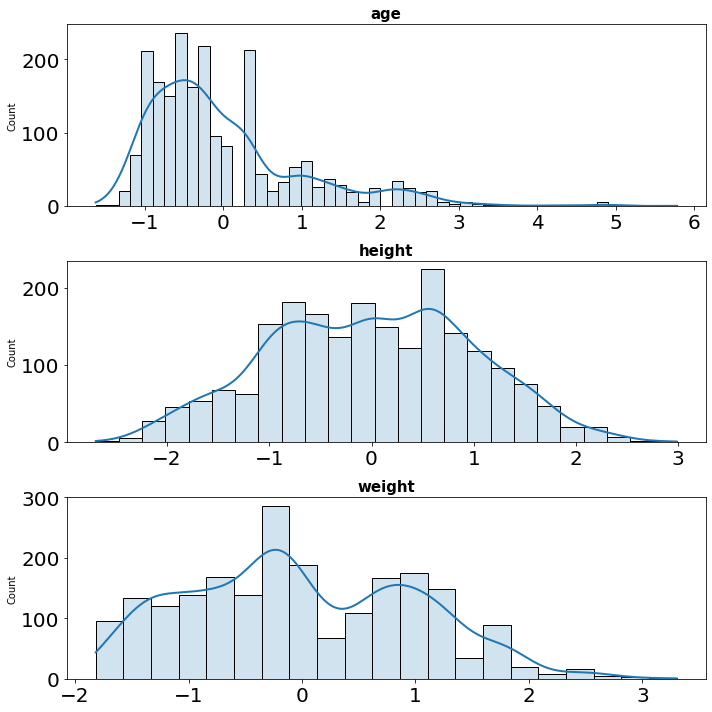

In [44]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 10))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.tight_layout()


In [45]:
df[numericas_estandar.columns] = numericas_estandar
df.head()


,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.521741,2.0,3.0,2.0,0.0,1.0,-0.875589,-0.862558
1,1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.521741,3.0,3.0,3.0,3.0,0.0,-1.947599,-1.168077
2,2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.207057,2.0,3.0,2.0,2.0,1.0,1.054029,-0.366090
3,3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.422312,3.0,3.0,2.0,2.0,0.0,1.054029,0.015808
4,4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364399,2.0,1.0,2.0,0.0,0.0,0.839627,0.122740


### Encoding

Verificamos las columnas que necesitamos codificar

In [49]:
categoricas= df.select_dtypes(include=object)
categoricas

,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


Utilizarmos label-ecoding

Creamos una bucle for para codificar todas las variables categóricas:


In [50]:
for columna in categoricas.columns:
    le = LabelEncoder()
    df[columna]=le.fit_transform(df[columna])


In [51]:
#comprobamos que la codificación fuera correcta:

df.head(3)

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,0,1,0,2,0,0,3,3,1,-0.521741,2.0,3.0,2.0,0.0,1.0,-0.875589,-0.862558
1,1,0,1,0,2,1,1,2,3,1,-0.521741,3.0,3.0,3.0,3.0,0.0,-1.947599,-1.168077
2,2,1,1,0,2,0,0,1,3,1,-0.207057,2.0,3.0,2.0,2.0,1.0,1.054029,-0.366090


### Información adicional encoding:

|   gender:	| 	|
|---	|---	|
|  female = 0   	|   male = 1	|

-

|  antecedentes_familiares: 	|   	|
|---	|---	|
|  yes = 1 	|   no = 0	|

-

|  comida_calorica: 	|   	|
|---	|---	|
|  yes = 1 	|   no = 0	|

-
|  snacks: 	|   	|   	|   	|
|---	|---	|---	|---	|
|  Always = 0 	|   Frequently = 1	|   Sometimes = 2 	|   No = 3	| 

-
|  smoke: 	|   	|
|---	|---	|
|  yes = 1 	|   no = 0	|

-
|  mide_calorias: 	|   	|
|---	|---	|
|  yes = 1 	|   no = 0	|

-

|  freq_alcohol: 	|   	|   	|   	|
|---	|---	|---	|---	|
|  Always = 0 	|   Frequently = 1	|   Sometimes = 2 	|   No = 3	| 

-

|  medio_transporte: 	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|
|  Automobile = 0 	|  Bike = 1 	|   Motorbike = 2	|  Public_Transportation = 3 	|  Walking = 4 	|

-

|  nivel_obesidad: 	|   	|   	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|---	|---	|
|  Insufficient_Weight = 0 	|  Normal_Weight = 1 	|  Obesity_Type_I = 2 	|  Obesity_Type_II = 3 	|  Obesity_Type_III = 4 	| Overweight_Level_I = 5  	|   Overweight_Level_II = 6	|

### Balanceo de la variable respuesta

En el caso del balanceo no fue necesario para nuestro conjunto de datos especifico, ya que las categorías se encuentran bastante bien balanceadas por lo que continuaremos con las filas originales.

In [54]:
# guardamos los datos

df.to_pickle("../Datos/obesity_est_encoding.pkl")